In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Read Data From File

In [2]:
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

In [3]:
data.head()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
mojombo,1,79,0,1970379,0,0,0,0,2566099,928419,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2,1,0,4609687,0,0,0,0,0,470103,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,4,358,0,3378185,0,0,0,0,2687760,952,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,19,3473,0,11661,0,0,0,0,0,951748,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,20,18,0,0,0,0,0,0,0,43311,...,0,0,0,0,0,0,0,0,0,8688


In [4]:
data.describe()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,139.000000,139.000000,139.0,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,139.000000,1.390000e+02,1.390000e+02,...,1.390000e+02,139.000000,139.000000,139.000000,1.390000e+02,1.390000e+02,139.000000,139.0,139.0,1.390000e+02
mean,215.568345,964.633094,0.0,5.305769e+05,1.696099e+05,1.071476e+05,7.557439e+03,4467.474820,2.263256e+05,8.454272e+05,...,2.964770e+04,2522.834532,92.906475,15.302158,7.588637e+04,1.400676e+06,34.906475,0.0,0.0,7.780925e+05
std,119.741875,1092.528600,0.0,2.452736e+06,1.295977e+06,9.264683e+05,8.861764e+04,33784.577371,1.240423e+06,3.062380e+06,...,3.462298e+05,20475.877673,800.500214,180.238998,4.564998e+05,1.574822e+07,411.541269,0.0,0.0,4.535129e+06
min,1.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000e+00
25%,126.000000,80.500000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.949500e+03
50%,211.000000,484.000000,0.0,4.111000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.052500e+04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.047000e+03,0.000000,0.0,0.0,1.667500e+04
75%,292.500000,1525.000000,0.0,8.182850e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.420400e+05,...,0.000000e+00,0.000000,0.000000,0.000000,7.867500e+03,2.487550e+04,0.000000,0.0,0.0,1.653110e+05
max,441.000000,4670.000000,0.0,2.020036e+07,1.294834e+07,1.062182e+07,1.044820e+06,365804.000000,1.279332e+07,1.967654e+07,...,4.082184e+06,199825.000000,8224.000000,2125.000000,4.753033e+06,1.857201e+08,4852.000000,0.0,0.0,4.876602e+07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, mojombo to jduff
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Username       139 non-null    int64
 1   Id             139 non-null    int64
 2   Contributions  139 non-null    int64
 3   JavaScript     139 non-null    int64
 4   Python         139 non-null    int64
 5   Java           139 non-null    int64
 6   C#             139 non-null    int64
 7   PHP            139 non-null    int64
 8   TypeScript     139 non-null    int64
 9   Ruby           139 non-null    int64
 10  C++            139 non-null    int64
 11  C              139 non-null    int64
 12  Swift          139 non-null    int64
 13  Go             139 non-null    int64
 14  Shell          139 non-null    int64
 15  Kotlin         139 non-null    int64
 16  Rust           139 non-null    int64
 17  PowerShell     139 non-null    int64
 18  Objective-C    139 non-null    int64
 19  R    

## Transform Data

#### 1. Standardize the data using a StandardScaler

In [6]:
scaler = StandardScaler()
col = ["JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
data[[x + '-T' for x in col]] = scaler.fit_transform(data[col])
data.head()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
mojombo,1,79,0,1970379,0,0,0,0,2566099,928419,...,-0.08594,-0.123656,-0.11648,-0.085206,-0.149781,-0.088152,-0.085126,0.0,0.0,-0.119042
defunkt,2,1,0,4609687,0,0,0,0,0,470103,...,-0.08594,-0.123656,-0.11648,-0.085206,-0.152768,-0.087738,-0.085126,0.0,0.0,0.026185
wycats,4,358,0,3378185,0,0,0,0,2687760,952,...,-0.08594,-0.123656,-0.11648,-0.085206,-0.119259,-0.061126,-0.085126,0.0,0.0,-0.171513
brynary,19,3473,0,11661,0,0,0,0,0,951748,...,-0.08594,-0.123656,-0.11648,-0.085206,-0.166837,-0.088119,-0.085126,0.0,0.0,-0.171495
kevinclark,20,18,0,0,0,0,0,0,0,43311,...,-0.08594,-0.123656,-0.11648,-0.085206,-0.166837,-0.089264,-0.085126,0.0,0.0,-0.170268


#### 2. Determine Number of Clusters

In [7]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

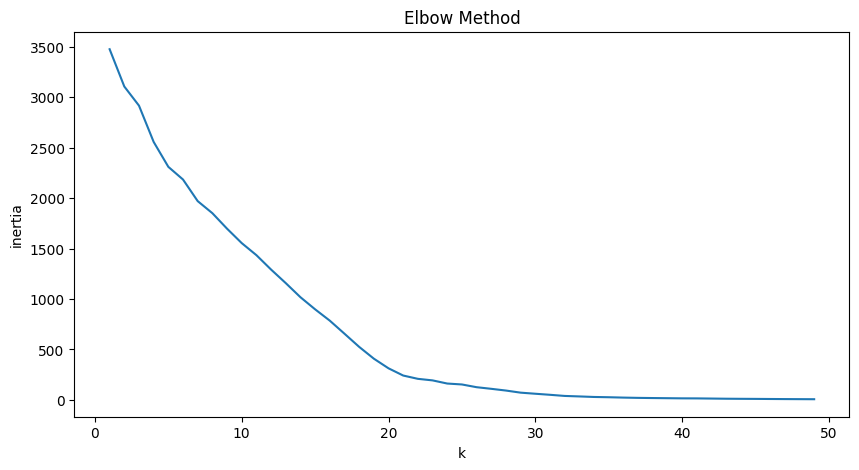

In [8]:
tcols = [x + '-T' for x in col]
optimize_kmeans(data[tcols], 50)

#### 3. Apply K-Means Clustering

In [9]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
mojombo,1,79,0,1970379,0,0,0,0,2566099,928419,...,-0.123656,-0.11648,-0.085206,-0.149781,-0.088152,-0.085126,0.0,0.0,-0.119042,0
defunkt,2,1,0,4609687,0,0,0,0,0,470103,...,-0.123656,-0.11648,-0.085206,-0.152768,-0.087738,-0.085126,0.0,0.0,0.026185,0
wycats,4,358,0,3378185,0,0,0,0,2687760,952,...,-0.123656,-0.11648,-0.085206,-0.119259,-0.061126,-0.085126,0.0,0.0,-0.171513,0
brynary,19,3473,0,11661,0,0,0,0,0,951748,...,-0.123656,-0.11648,-0.085206,-0.166837,-0.088119,-0.085126,0.0,0.0,-0.171495,0
kevinclark,20,18,0,0,0,0,0,0,0,43311,...,-0.123656,-0.11648,-0.085206,-0.166837,-0.089264,-0.085126,0.0,0.0,-0.170268,0


## Write to File

In [10]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)